<a href="https://colab.research.google.com/github/VladislavasR/GitDemoProject/blob/master/03_Pandas/PP3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [ ]:
users = pd.read_csv(url, sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [ ]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [ ]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [ ]:
users.shape[0] # 943 observations

943

### Step 7. What is the number of columns in the dataset?

In [ ]:
users.shape[1] # 4 columns

4

### Step 8. Print the name of all the columns.

In [ ]:
list(users.columns)

['age', 'gender', 'occupation', 'zip_code']

### Step 9. How is the dataset indexed?

In [ ]:
print(users['gender'].head()) # first 5 gender values with user_ids
print('----------------------------')
print(users.loc[940]) # values of row with user_id 940
print('----------------------------')
print(users.iloc[[1, 4], [0, 2]]) # 2nd, 4th row with 1st and 3rd columns

user_id
1    M
2    F
3    M
4    M
5    F
Name: gender, dtype: object
----------------------------
age                      32
gender                    M
occupation    administrator
zip_code              02215
Name: 940, dtype: object
----------------------------
         age occupation
user_id                
2         53      other
5         33      other


### Step 10. What is the data type of each column?

In [ ]:
users.dtypes # data type of each column

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [ ]:
print(users['occupation'].to_string(index=False))

user_id
   technician
        other
       writer
   technician
        other
    executive
administrator
administrator
      student
       lawyer
        other
        other
     educator
    scientist
     educator
entertainment
   programmer
        other
    librarian
    homemaker
       writer
       writer
       artist
       artist
     engineer
     engineer
    librarian
       writer
   programmer
      student
       artist
      student
      student
administrator
    homemaker
      student
      student
        other
entertainment
    scientist
     engineer
administrator
    librarian
   technician
   programmer
    marketing
    marketing
administrator
      student
       writer
     educator
      student
   programmer
    executive
   programmer
    librarian
         none
   programmer
     educator
   healthcare
     engineer
administrator
    marketing
     educator
     educator
      student
      student
      student
     engineer
     engineer
    scientis

### Step 12. How many different occupations are in this dataset?

In [ ]:
all_occupations = users[users['occupation'] != 'none']
len(all_occupations['occupation'].unique()) # 20 including retired as one of occupation

20

### Step 13. What is the most frequent occupation?

In [ ]:
all_occupations['occupation'].mode() # student

0    student
dtype: object

### Step 14. Summarize the DataFrame.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 69.1+ KB


### Step 15. Summarize all the columns

In [ ]:
users.describe(include = ['int', 'object'])

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [ ]:
users['occupation'].describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [ ]:
users['age'].mean() # 34.05196182396607

34.05196182396607

### Step 18. What is the age with least occurrence?

In [ ]:
age_counts = users['age'].value_counts()
rare_ages = age_counts[age_counts <= 1]
rare_ages # 7, 10, 11, 66, 73

7     1
66    1
11    1
10    1
73    1
Name: age, dtype: int64

## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

In [ ]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

### Step 3. Assign it to a variable called euro12.

In [ ]:
euro12 = pd.read_csv(url, sep=',')

### Step 4. Select only the Goal column.

In [ ]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [ ]:
euro12.shape[0] # 16 teams

16

### Step 6. What is the number of columns in the dataset?

In [ ]:
euro12.shape[1] # 35 columns

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [ ]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [ ]:
sorted_teams = discipline.sort_values(['Red Cards', 'Yellow Cards'])

### Step 9. Calculate the mean Yellow Cards given per Team

In [ ]:
euro12['Yellow Cards'].mean()

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [ ]:
good_teams = euro12[euro12['Goals'] > 6]

### Step 11. Select the teams that start with G

In [ ]:
g_teams = euro12[euro12['Team'].str.startswith('G')]

### Step 12. Select the first 7 columns

In [ ]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [ ]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [ ]:
euro12.loc[(euro12['Team'] == 'England') | (euro12['Team'] == 'Italy') | (euro12['Team'] == 'Russia'), 'Shooting Accuracy']

3     50.0%
7     43.0%
12    22.5%
Name: Shooting Accuracy, dtype: object

## Section 3: Grouping

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

In [ ]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

### Step 3. Assign it to a variable called drinks.

In [ ]:
drinks = pd.read_csv(url, sep=',')

### Step 4. Which continent drinks more beer on average?

In [ ]:
groups_by_cont = drinks.groupby('continent')
groups_by_cont['beer_servings'].agg('mean').nlargest().head(1) # EU

continent
EU    193.777778
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
for name, item in groups_by_cont:
  print(f'{name} mean: {item["wine_servings"].mean()}')
  print(f'{name} median: {item["wine_servings"].median()}')

AF mean: 16.264150943396228
AF median: 2.0
AS mean: 9.068181818181818
AS median: 1.0
EU mean: 142.22222222222223
EU median: 128.0
OC mean: 35.625
OC median: 8.5
SA mean: 62.416666666666664
SA median: 12.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [ ]:
for name, item in groups_by_cont:
  print(f'{name} beer: {item["beer_servings"].mean()}')
  print(f'{name} spirit: {item["spirit_servings"].mean()}')
  print(f'{name} wine: {item["wine_servings"].mean()}')
  print(f'{name} total: {item["total_litres_of_pure_alcohol"].mean()}')

AF beer: 61.471698113207545
AF spirit: 16.339622641509433
AF wine: 16.264150943396228
AF total: 3.0075471698113208
AS beer: 37.04545454545455
AS spirit: 60.84090909090909
AS wine: 9.068181818181818
AS total: 2.170454545454545
EU beer: 193.77777777777777
EU spirit: 132.55555555555554
EU wine: 142.22222222222223
EU total: 8.617777777777775
OC beer: 89.6875
OC spirit: 58.4375
OC wine: 35.625
OC total: 3.3812499999999996
SA beer: 175.08333333333334
SA spirit: 114.75
SA wine: 62.416666666666664
SA total: 6.308333333333334


### Step 7. Print the median alcohol consumption per continent for every column

In [ ]:
for name, item in groups_by_cont:
  print(f'{name} beer: {item["beer_servings"].median()}')
  print(f'{name} spirit: {item["spirit_servings"].median()}')
  print(f'{name} wine: {item["wine_servings"].median()}')
  print(f'{name} total: {item["total_litres_of_pure_alcohol"].median()}')

AF beer: 32.0
AF spirit: 3.0
AF wine: 2.0
AF total: 2.3
AS beer: 17.5
AS spirit: 16.0
AS wine: 1.0
AS total: 1.2
EU beer: 219.0
EU spirit: 122.0
EU wine: 128.0
EU total: 10.0
OC beer: 52.5
OC spirit: 37.0
OC wine: 8.5
OC total: 1.75
SA beer: 162.5
SA spirit: 108.5
SA wine: 12.0
SA total: 6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [ ]:
groups_by_cont.agg(['mean', 'min', 'max'])

beer_servings          spirit_servings          wine_servings      \
                   mean min  max            mean min  max          mean min   
continent                                                                     
AF            61.471698   0  376       16.339623   0  152     16.264151   0   
AS            37.045455   0  247       60.840909   0  326      9.068182   0   
EU           193.777778   0  361      132.555556   0  373    142.222222   0   
OC            89.687500   0  306       58.437500   0  254     35.625000   0   
SA           175.083333  93  333      114.750000  25  302     62.416667   1   

               total_litres_of_pure_alcohol             
           max                         mean  min   max  
continent                                               
AF         233                     3.007547  0.0   9.1  
AS         123                     2.170455  0.0  11.5  
EU         370                     8.617778  0.0  14.4  
OC         212                     3.381250  0.0  10.4  
SA         221                     6.308333  3.8   8.3

## Section 4: Apply

### Step 1. Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

In [9]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'

### Step 3. Assign it to a variable called crime.

In [10]:
crime = pd.read_csv(url, sep=',')

### Step 4. What is the type of the columns?

In [11]:
crime.info() # int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [12]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')

### Step 6. Set the Year column as the index of the dataframe

In [13]:
crime.set_index('Year', inplace=True)

### Step 7. Delete the Total column

In [ ]:
crime_no_total = crime.drop('Total', axis=1)
crime_no_total

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [ ]:
group_by_dec = crime.groupby((crime.index.year//10)*10)
sum_of_crimes = group_by_dec.agg({'Population' : np.max, 'Total' : np.sum, 'Violent' : np.sum, 'Property' : np.sum, 'Murder' : np.sum, 'Forcible_Rape' : np.sum, 'Robbery' : np.sum,
                 'Aggravated_assault' : np.sum, 'Burglary' : np.sum, 'Larceny_Theft' : np.sum, 'Vehicle_Theft' : np.sum})
sum_of_crimes

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,201385000,49295900,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,100991600,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,131123369,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,115012044,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,50167967,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [ ]:
sum_of_crimes.sort_values('Total', ascending=False).head(1) # 1990

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1990,272690813,136582146,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418


## Section 5: Merge

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Create the 3 DataFrames based on the following raw data

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [ ]:
data1 = pd.DataFrame.from_dict(raw_data_1)
data2 = pd.DataFrame.from_dict(raw_data_2)
data3 = pd.DataFrame.from_dict(raw_data_3)

### Step 4. Join the two dataframes along rows and assign all_data

In [ ]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [ ]:
all_data_col = pd.concat([data1, data2], axis=1)

### Step 6. Print data3

In [ ]:
print(data3)

  subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16


### Step 7. Merge all_data and data3 along the subject_id value

In [ ]:
merged_df = pd.merge(all_data, data3, on="subject_id")

### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [ ]:
all_data_by_id = pd.merge(data1, data2, left_on="subject_id", right_on="subject_id")

### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [ ]:
data_by_match = pd.merge(data1, data2, on="subject_id", how="inner")

## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [ ]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [103]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

In [127]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [128]:
data = pd.read_csv(url, delimiter=r"\s+")
data = data.rename({'Yr': 'Year', 'Mo': 'Month', 'Dy': 'Day'}, axis=1)
full_date = data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-'  + data['Day'].astype(str)
data.drop(columns=data.columns[0:3], axis=1, inplace=True)
data.insert(0, column='Date', value = full_date)
data['Date'] = pd.to_datetime(data['Date'])

### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [132]:
data['Date'] = data['Date'].mask(data['Date'].dt.year > 2022, data['Date'] - pd.offsets.DateOffset(years=100))

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [133]:
data.set_index('Date', inplace=True)

### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [134]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [135]:
data.count().sum() - data.isna().sum().sum() # 85400

78826

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [136]:
data.fillna(data.mean(), inplace=True)
data.mean().mean() # 10.227982360836936

10.227982360836936

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [137]:
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [140]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [142]:
groups_by_month = data.groupby(by=[data.index.month])
groups_by_month.mean().head(1)

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1,14.842873,12.910492,13.299624,7.199498,11.66339,8.054839,11.819355,9.510224,9.543208,10.053566,14.55052,18.028763


### Step 12. Downsample the record to a yearly frequency for each location.

In [144]:
data_yearly = data.resample('Y').mean()

### Step 13. Downsample the record to a monthly frequency for each location.

In [147]:
data_monthly = data.resample('M').mean()

### Step 14. Downsample the record to a weekly frequency for each location.

In [164]:
data_weekly = data.resample('W').mean()

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [167]:
data_from_2nd = data.iloc[1: , :]
data_weekly_from_2nd = data_from_2nd.resample('W').mean()
weekly_stats_52 = data_weekly_from_2nd.iloc[0:52, :].agg(['min', 'max', 'mean', 'std'], axis=1)

## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [209]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [210]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

### Step 3. Assign it to a variable titanic 

In [211]:
titanic = pd.read_csv(url, sep=',')

### Step 4. Set PassengerId as the index 

In [212]:
titanic.set_index('PassengerId', inplace=True)

### Step 5. Create a pie chart presenting the male/female proportion

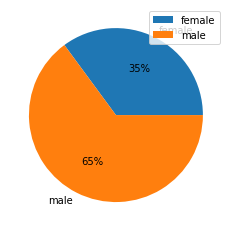

In [213]:
groups_by_sex = titanic.groupby(['Sex']).count()
groups_by_sex.plot(kind='pie', y='Embarked', autopct='%1.0f%%', ylabel='')

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

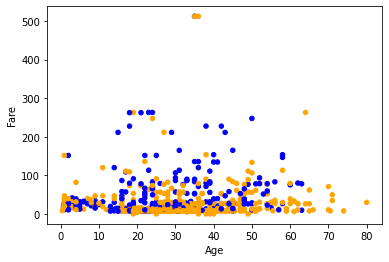

In [218]:
clr = {'male':'orange', 'female':'blue'}
titanic['Color'] = titanic['Sex'].apply(lambda x: clr[x])
titanic.plot.scatter(x='Age', y='Fare', c='Color')

### Step 7. How many people survived?

In [250]:
titanic['Survived'].sum() # 342
titanic['Fare'].mode()

0    8.05
dtype: float64

### Step 8. Create a histogram with the Fare payed

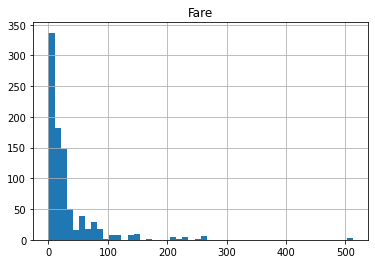

In [266]:
hist_fare = titanic.hist(column='Fare', bins=50)

### BONUS: Create your own question and answer it.

## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [267]:
import pandas as pd
import numpy as np

### Step 2. Create a data dictionary that looks like the DataFrame below

In [268]:
data = {
    'evolution' : ['Ivysaur', 'Charmeleon', 'Wartortle', 'Metapod'],
    'hp' : [45, 39, 44, 45],
    'name' : ['Bulbasaur', 'Charmander', 'Squirtle', 'Caterpie'],
    'pokedex' : ['yes', 'no', 'yes', 'no'],
    'type' : ['grass', 'fire', 'wated', 'bug']
}

### Step 3. Assign it to a variable called pokemon

In [287]:
pokemon = pd.DataFrame(data)

### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [288]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]

### Step 5. Add another column called place, and insert what you have in mind.

In [289]:
pokemon['place'] = [3, 1, 2, 4]

### Step 6. Present the type of each column

In [290]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 320.0+ bytes


### BONUS: Create your own question and answer it.

## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

### Step 4.  Check out the type of the columns

### Step 5. Transform the Date column as a datetime type

### Step 6.  Set the date as the index

### Step 7.  Is there any duplicate dates?

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

### Step 9. Get the last business day of each month

### Step 10.  What is the difference in days between the first day and the oldest

### Step 11.  How many months in the data we have?

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

### Step 6. Set the values of the first 3 rows from alcohol as NaN

### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

### Step 9. Count the number of missing values

### Step 10.  Create an array of 10 random numbers up until 10

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

### Step 12.  How many missing values do we have?

### Step 13. Delete the rows that contain missing values

### Step 14. Print only the non-null values in alcohol

### Step 15.  Reset the index, so it starts with 0 again